1. Formular el problema de cuadrados mínimos para el ajuste solicitado, escribiendo la matriz de diseño, el vector de parámetros, el vector de datos a ajustar, las ecuaciones normales, y las dimensiones de cada uno.
2. Hallar la solución al problema resolviendo las ecuaciones normales.
3. Calcular el error de aproximación dado por ∥y − X ˆa∥.
4. Reportar los valores de los parámetros óptimos hallados redondeando a una cantidad de cifras significativas razonable.

Ejercicio 1. Ajuste lineal.
a)Hallar la recta que mejor aproxima el conjunto de datos (1) en el sentido de cuadrados mínimos.
b)Graficar en una misma figura los datos (xi, yi) junto con la recta ajustada.
c)¿Qué valor se obtendría si se usara la recta ajustada para intentar estimar el valor de la función
desconocida cuando x = 5?

# Matriz de Diseño
La matriz de diseño se representa como 
${\mathbb{R}^m}$ :
$$X=
\begin{bmatrix}
    1 & x_{1}\\
    1 & x_{2}\\
    \vdots & \vdots\\
    1 & x_{m}\\
\end{bmatrix}
$$

x son los datos de la muestra y m es el tamaño de la muestra
# Vector de Parámetros
El vector de parámetros se representa como:
${\mathbb{R}^2}$ :
$$a=
\begin{bmatrix}
    a_{0}\\
    a_{1}\\
\end{bmatrix}
=
\begin{bmatrix}
    \beta_{0}\\
    \beta_{1}\\
\end{bmatrix}

$$
# Vector de Datos a Ajustar
El vector de datos a ajustar se representa como:
${\mathbb{R}^m}$ :
$$
y=
\begin{bmatrix}
    y_{1}\\
    y_{2}\\
    \vdots\\
    y_{m}\\
\end{bmatrix}
$$
y son los datos de la muestra y m es el tamaño de la muestra
# Ecuaciones Normales
Las ecuaciones normales para el ajuste lineal son:
$$
X^T X \theta = X^T y
$$


In [3]:
#vector parametros = a
#vector resultados = y

import numpy as np
x, y = np.load("ejercicio_1.npy")
x = np.array(x)
y = np.array(y)

matrix_design = np.column_stack((np.ones_like(x),x))
matrix_designT = np.transpose(matrix_design)

inverse = np.matmul(np.linalg.inv(np.matmul(matrix_designT,matrix_design)),matrix_designT)
a = np.matmul(inverse,y)

error = y - np.matmul(matrix_design,a)
norma = np.linalg.norm(error)

B0 = a[0]
B1 = a[1]
print('B0=', round(B0,2),'B1=', round(B1,2))

B0= 5.12 B1= 1.88


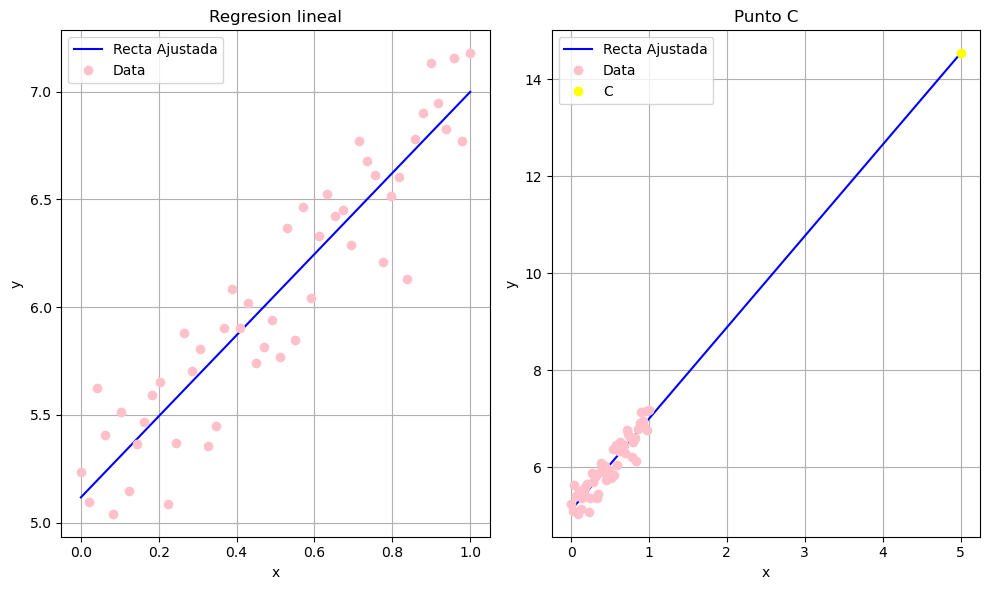

Se obtendría para intentar estimar el valor de la función desconocida cuando x=5, y= 14.53


In [4]:
import matplotlib.pyplot as plt

xs = np.linspace(0, 1, 100)
ys = B0 + B1*xs 

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(xs, ys, label='Recta Ajustada', color='blue')
plt.plot(x, y, marker='o', linestyle='', color='pink', label='Data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresion lineal')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
xs = np.linspace(0, 5, 100)
ys = B0 + B1*xs 
c = B0 + B1*5
plt.plot(xs, ys, label='Recta Ajustada', color='blue')
plt.plot(x, y, marker='o', linestyle='', color='pink', label='Data')
plt.plot(5, c, marker='o', label='C', color='yellow', linestyle='')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Punto C')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

print('Se obtendría para intentar estimar el valor de la función desconocida cuando x=5, y=', round(c,2))

Ejercicio 2. Ajustes polinomiales.
a)Hallar la parábola que mejor aproxima el conjunto de datos (2) en el sentido de cuadrados mínimos.
b)Repetir con una función cúbica.
c)Graficar en una misma figura los datos junto con ambas curvas halladas.
d)¿Cuál es mejor?

In [5]:
#vector parametros = a
#vector resultados = y

import numpy as np
x, y = np.load("ejercicio_2.npy")
x = np.array(x)
y = np.array(y)

matrix_design = np.column_stack((np.ones_like(x),x,x**2))
matrix_designT = np.transpose(matrix_design)

inverse = np.matmul(np.linalg.inv(np.matmul(matrix_designT,matrix_design)),matrix_designT)
a = np.matmul(inverse,y)

error = y - np.matmul(matrix_design,a)
norma = np.linalg.norm(error)

B0_2 = a[0]
B1_2 = a[1]
B2_2 = a[2]
print('B0=', round(B0_2,2),'B1=', round(B1_2,2), 'B2=', round(B2_2,2))

B0= -0.46 B1= -0.17 B2= 0.09


In [7]:
#vector parametros = a
#vector resultados = y

import numpy as np
x, y = np.load("ejercicio_2.npy")
x = np.array(x)
y = np.array(y)

matrix_design = np.column_stack((np.ones_like(x),x,x**2,x**3))
matrix_designT = np.transpose(matrix_design)

inverse = np.matmul(np.linalg.inv(np.matmul(matrix_designT,matrix_design)),matrix_designT)
a = np.matmul(inverse,y)

error = y - np.matmul(matrix_design,a)
norma = np.linalg.norm(error)

B0_3 = a[0]
B1_3 = a[1]
B2_3 = a[2]
B3_3 = a[3]
print('B0=', round(B0_3,2),'B1=', round(B1_3,2), 'B2=', round(B2_3,2), 'B3=', round(B3_3,2))

B0= -25.95 B1= 28.53 B2= -10.01 B3= 1.12


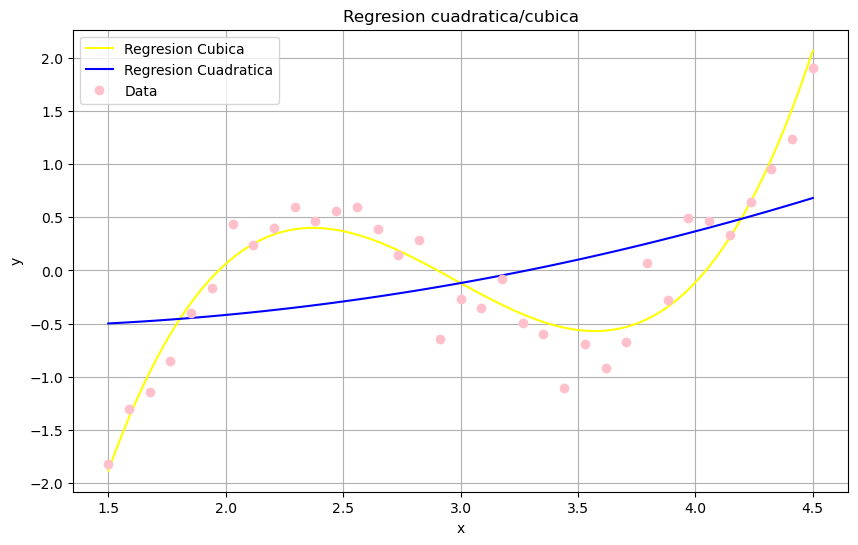

Cubica mejor


In [8]:
import matplotlib.pyplot as plt

xs = np.linspace(1.5, 4.5, 100)
ys = B0_2 + B1_2*xs + B2_2*xs*xs
yss = B0_3 + B1_3*xs + B2_3*xs*xs +  B3_3*xs*xs*xs

plt.figure(figsize=(10, 6))
plt.plot(xs, yss, label='Regresion Cubica', color='yellow')
plt.plot(xs, ys, label='Regresion Cuadratica', color='blue')
plt.plot(x, y, marker='o', linestyle='', color='pink', label='Data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresion cuadratica/cubica')
plt.grid(True)
plt.legend()
plt.show()
print('Cubica mejor')

Ejercicio 3. Ajustes no polinomiales.
El objetivo en esta sección es explorar otras formas funcionales no polinomiales. (Ver por ejemplo
Series de Fourier). Tener en cuenta el trade-off entre cantidad de parámetros involucrados y el error de
aproximación, es decir, estimar la mínima cantidad de parámetros que resulten en un ajuste razonable.

a)Para los conjuntos de datos (3.i) y (3.ii) por separado, proponer una forma funcional adecuada
y hallar la curva de la forma propuesta que mejor aproxima los datos en el sentido de cuadrados
mínimos.
b)Graficar en dos figuras distintas los conjuntos de datos y las curvas ajustadas en cada caso

In [35]:
#vector parametros = a
#vector resultados = y

import numpy as np
x, y = np.load("ejercicio_3_i.npy")
x = np.array(x)
y = np.array(y)

matrix_design = np.column_stack((x,np.cos(x),np.cos(x)**2,np.cos(x)**3))
matrix_designT = np.transpose(matrix_design)

inverse = np.matmul(np.linalg.inv(np.matmul(matrix_designT,matrix_design)),matrix_designT)
a = np.matmul(inverse,y)

error = y - np.matmul(matrix_design,a)
norma = np.linalg.norm(error)

[0.01736197 0.21239723 0.41568775 0.27801038]


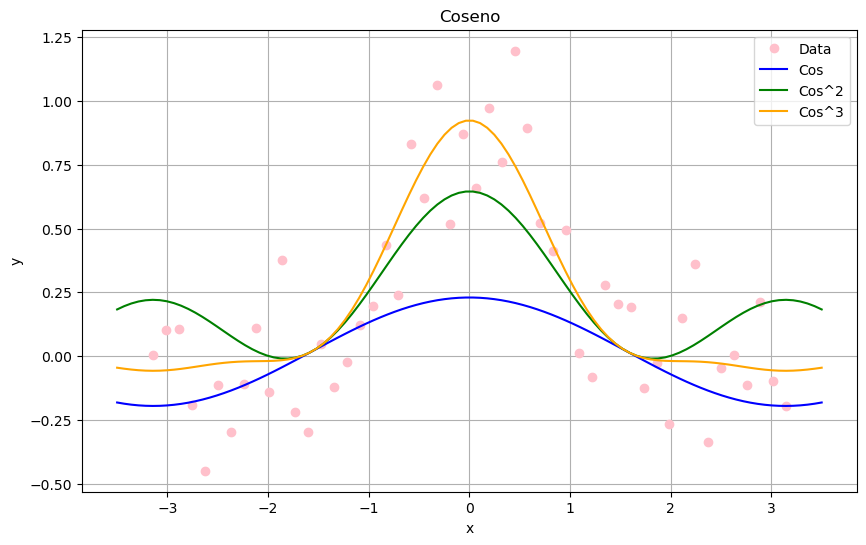

In [42]:
import matplotlib.pyplot as plt

xs = np.linspace(-3.5, 3.5, 100)
y1 = a[0] + a[1]*np.cos(xs)
y2 = a[0] + a[1]*np.cos(xs)+ a[2]*(np.cos(xs)**2) 
y3 = a[0] + a[1]*np.cos(xs)+ a[2]*(np.cos(xs)**2) + a[3]*(np.cos(xs)**3)

plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='', color='pink', label='Data')
plt.plot(xs, y1, label='Cos', color='blue')
plt.plot(xs, y2, label='Cos^2', color='green')
plt.plot(xs, y3, label='Cos^3', color='orange')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coseno')
plt.grid(True)
plt.legend()
plt.show()

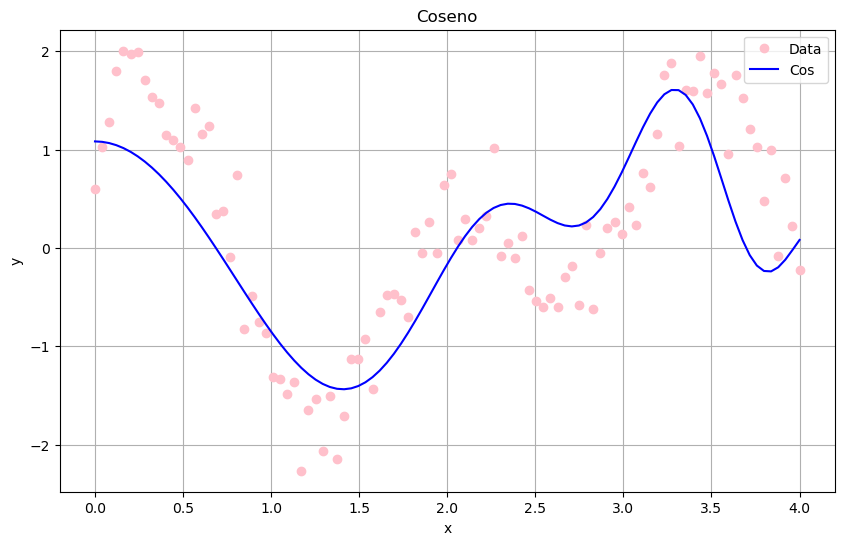

In [73]:
#vector parametros = a
#vector resultados = y
x, y = np.load("ejercicio_3_ii.npy")
x = np.array(x)
y = np.array(y)

O = 2 #2
P = 2 #2

# matrix_design = np.column_stack((x,np.cos(x),np.cos(x)**2,np.cos(x)**3,np.cos(x)**4,np.cos(x)**5,np.cos(x)**6))
matrix_design = np.column_stack((x,np.cos(x*O),np.sin(x**P)))
matrix_designT = np.transpose(matrix_design)

inverse = np.matmul(np.linalg.inv(np.matmul(matrix_designT,matrix_design)),matrix_designT)
a = np.matmul(inverse,y)

error = y - np.matmul(matrix_design,a)
norma = np.linalg.norm(error)

xs = np.linspace(0, 4, 100)
# y1 = a[0] + a[1]*np.cos(xs)
# y2 = a[0] + a[1]*np.cos(xs)+ a[2]*(np.cos(xs)**2) 
# y3 = a[0] + a[1]*np.cos(xs)+ a[2]*(np.cos(xs)**2) + a[3]*(np.cos(xs)**3)
# y6 = a[0] + a[1]*np.cos(xs)+ a[2]*(np.cos(xs)**2) + a[3]*(np.cos(xs)**3) + a[4]*np.cos(xs)**4+ a[5]*(np.cos(xs)**5) + a[6]*(np.cos(xs)**6)
yy = a[0] + a[1]*(np.cos(xs*O))+a[2]*(np.sin(xs**P))

plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='', color='pink', label='Data')
plt.plot(xs, yy, label='Cos', color='blue')
# plt.plot(xs, y2, label='Cos^2', color='green')
# plt.plot(xs, y3, label='Cos^3', color='orange')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coseno')
plt.grid(True)
plt.legend()
plt.show()